initialized:
weight changed:
created die:
show die state 1:
   side   weights
0     1  0.166667
1     2  0.166667
2     3  0.166667
3     4  0.166667
4     5  0.166667
5     6  0.166667
show die state 2:
   side   weights
0     1  0.166667
1     2  0.166667
2     3  0.166667
3     4  0.166667
4     5  0.166667
5     6  0.166667
die_list: [   side   weights
0     1  0.166667
1     2  0.166667
2     3  0.166667
3     4  0.166667
4     5  0.166667
5     6  0.166667,    side   weights
0     1  0.166667
1     2  0.166667
2     3  0.166667
3     4  0.166667
4     5  0.166667
5     6  0.166667]
rolled die 1:
results1:    0
0  5
1  1
2  4
3  4
4  3
5  2
6  4
7  2
8  1
9  6


/sfs/gpfs/tardis/home/wpl3a/ (unittest.loader._FailedTest./sfs/gpfs/tardis/home/wpl3a/) ... ERROR

ERROR: /sfs/gpfs/tardis/home/wpl3a/ (unittest.loader._FailedTest./sfs/gpfs/tardis/home/wpl3a/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/sfs/gpfs/tardis/home/wpl3a/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


NARROW:
 <bound method DataFrame.stack of    0
0  5
1  1
2  4
3  4
4  3
5  2
6  4
7  2
8  1
9  6>
my_results dimensions: (10, 1)
WIDE dimensions: (10,)
WIDE:
 0  0    5
   1    1
   2    4
   3    4
   4    3
   5    2
   6    4
   7    2
   8    1
   9    6
dtype: int64
in between plots
results2:    0
0  5
1  5
2  1
3  5
4  1
5  2
6  3
7  5
8  5
9  5
NARROW:
 <bound method DataFrame.stack of    0
0  5
1  5
2  1
3  5
4  1
5  2
6  3
7  5
8  5
9  5>
my_results dimensions: (10, 1)
WIDE dimensions: (10,)
WIDE:
 0  0    5
   1    5
   2    1
   3    5
   4    1
   5    2
   6    3
   7    5
   8    5
   9    5
dtype: int64
results_df head: Empty DataFrame
Columns: []
Index: []
results_df type: <class 'pandas.core.frame.DataFrame'>
results1 head    0
0  6
1  6
2  2
3  6
4  3
5  2
6  3
7  5
8  5
9  6
results1 type: <class 'pandas.core.frame.DataFrame'>
inside play loop results_df1:
    0  0
0  5  6
1  5  6
2  1  2
3  5  6
4  1  3
5  2  2
6  3  3
7  5  5
8  5  5
9  5  6


SystemExit: True

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


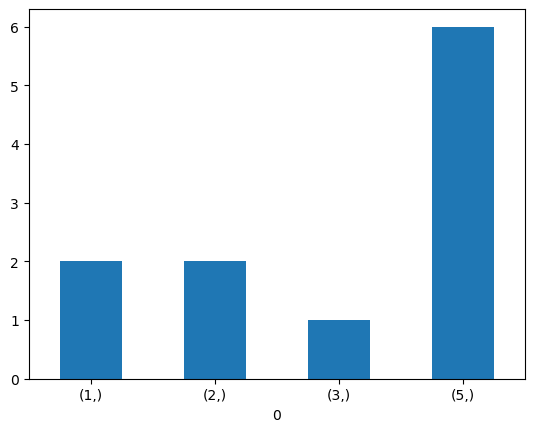

In [1]:
import numpy as np
import pandas as pd
import unittest
#import finalproject
from die import Die

class Game():
    '''General Definition
    A game consists of rolling of one or more similar dice (Die objects)
        one or more times.
    By similar dice, we mean that each die in a given game 
        has the same number of sides and associated faces, 
        but each die object may have its own weights.
    Each game is initialized with a Python list 
        that contains one or more dice.
    Game objects have a behavior to play a game, 
        i.e. to roll all of the dice a given number of times.
    Game objects only keep the results of their most recent play.
    Specific Methods and Attributes;
        1. An initializer
        2. A play method
        3. Show results of the most recent play
    '''
    def __init__(self, die_list):
        self.die_list = die_list
        ''' Takes a NumPy array of faces as an argument.'''
        return
    
    def play (self, number_of_rolls):
        '''
        Takes parameter specifying how many times 
            the dice should be rolled. Saves result of the play
            to a private data frame.
        The data frame should be in wide format, 
            i.e. have the roll number as a named index, 
            columns for each die number 
            (using its list index as the column name),
            and the face rolled in that instance in each cell.
        '''
#        self.number_of_rolls = number_of_rolls
        
        self.results1 = self.die_list.roll_die(number_of_rolls)
        print ('rolled die:') 
        print ('results:', self.results1)


    def show_results (self, form = 'w'):
        '''
        Takes parameter specifying wide or narrow format. 
        Returns a copy of the private play data frame
            to the user.
        Takes a parameter to return the data frame 
            in narrow or wide form which defaults to wide form.
        The narrow form will have a MultiIndex, 
            comprising the roll number and the dienumber (in that order), 
            and a single column with the outcomes (i.e. the face rolled).
        '''
        
        self.form = form.lower()
        if self.form != 'w' or self.form != 'n':
            raise ValueError('form is not "w" or "n".')
        return

        # verify faces is type (np.ndarray); TypeError if not
        if not isinstance (self.faces, np.ndarray):
            raise TypeError('faces is not an np array')

        # Tests to see if the values are distinct; ValueError if not
        if len(self.faces) != len(set(self.faces)):    # 'set' values are unique
            raise ValueError('faces are not unique')
            # NOTE: faces = np.unique (faces) removes "redundant" values        

        # Internally initializes the weights to 1.0 for each face.
        self.weights = np.ones(len(self.faces))
        #print (faces, weights)

        # Saves both faces and weights in a private data frame
        #   with faces in the index.
        index_values = [self.faces]
        self.faces_df = pd.DataFrame({'weights': self.weights}, index=index_values)

    def show_game_results(self, my_results):
        '''Show the results of rolling the dice n times with a simple bar graph.'''
        my_results.value_counts().sort_index().plot.bar(rot=0);
        # A method to show the die’s current state.
        #  Returns a copy of the private die data frame.
        
        
class GameTestSuite(unittest.TestCase):
    
    def test_1_play(self): 
        # 
        print ('entering test_1_play')        
 
        faces = np.arange (6)  # creates array
        faces_df = Die(faces)
        print ('initialized:')

        faces_df.change_weight (4, 5)
        print ('weight changed:')

    def test_2_show_game_results(self):
        print ('entering test_2_create_die')
        # 
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        n_sides = len(self.faces_df.weights)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        self.assertTrue(isinstance (self.die, pd.DataFrame))
        return self.die

faces = np.arange (6)  # creates array
faces_df1 = Die(faces) # instantiate Game objects
faces_df2 = Die(faces)
print ('initialized:')

faces_df1.change_weight (4, 5)
print ('weight changed:')

die1 = faces_df1.create_die (faces_df1)  # create die
die2 = faces_df2.create_die (faces_df2)
print ('created die:')

print ('show die state 1:')
die_deep1 = faces_df1.show_die_state (die1)
print (die_deep1)
print ('show die state 2:')
die_deep2 = faces_df2.show_die_state (die2)
print (die_deep2)

die_list = [die1, die2]
print ('die_list:', die_list)

n_rolls = 10

print ('rolled die 1:') 
results1 = faces_df1.roll_die(n_rolls)
#print ('results1 type', type (results1))
print ('results1:', results1)
faces_df1.plot_results (results1)

'''print ('rolled die 2:') 
results1 = die1.roll_die(n_rolls)
#print ('results1 type', type (results1))
print ('results1 using play:', results1)
faces_df1.plot_results (results1)
'''

print ('in between plots')
results2 = faces_df2.roll_die(n_rolls)
print ('results2:', results2)
faces_df2.plot_results (results2)

results_df = pd.DataFrame()
print ('results_df head:', results_df.head(10))
print ('results_df type:' ,type (results_df))
results1 = faces_df1.roll_die(n_rolls)
print ('results1 head', results1.head(10))
print ('results1 type:', type(results1))
results_df1 = pd.concat ([results2,results1], axis=1)
print ('inside play loop results_df1:\n', results_df1)


if __name__ == '__main__':
    unittest.main(verbosity=3)

In [1]:
#help (Game)